# Stage 3:- Sentiment Analysis


In [1]:
import json
import pandas as pd
from datetime import datetime
start_time=datetime.now()

In [2]:
with open('stage2.json') as f:
    data=json.load(f)
    

In [3]:
df=pd.DataFrame(data)

In [4]:
df.head()

,id,id_str,full_text,source,source_url,retweet_count,favorite_count,lang,full_text_lemmatiz
0,1469962406470336516,1469962406470336516,world gone mad marr criticising starmer suppor...,Twitter for iPad,http://twitter.com/#!/download/ipad,2590,15955,en,"[world, gone, mad, marr, criticising, starmer,..."
1,1469975237894803457,1469975237894803457,doctors amp nurses uk traumatized refusing red...,Twitter for iPhone,http://twitter.com/download/iphone,1851,4315,en,"[doctor, amp, nurse, uk, traumatized, refusing..."
2,1469726461456269315,1469726461456269315,exclusive nigerian government place uk canada ...,Twitter for Android,http://twitter.com/download/android,899,1896,en,"[exclusive, nigerian, government, place, uk, c..."
3,1470355047854845959,1470355047854845959,en france montauban chaos montauban angry farm...,Twitter for iPhone,http://twitter.com/download/iphone,35,0,en,"[en, france, montauban, chaos, montauban, angr..."
4,1470355036886781955,1470355036886781955,hospitals exist service citizens reward good b...,Twitter for Mac,http://itunes.apple.com/us/app/twitter/id40978...,326,0,en,"[hospital, exist, service, citizen, reward, go..."


In [5]:
# word_cloud
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text):

    # Create WordCloud 
    word_cloud = WordCloud(width = 550, height = 550, 
                           background_color ='white',  
                           min_font_size = 12).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 

    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # show plot
    plt.show()

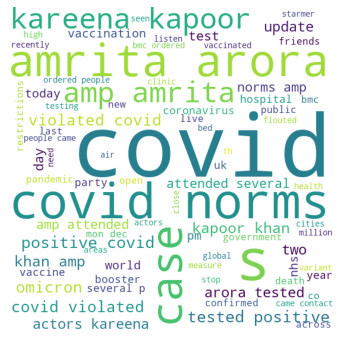

In [6]:
paragraph=' '.join(df['full_text'].tolist())
word_cloud(paragraph)

In [7]:
from textblob import TextBlob
def sentiment(text):
    return TextBlob(text).sentiment.subjectivity

def polarity(text):
    return TextBlob(text).sentiment.polarity

df['sentiment']= df['full_text'].apply(sentiment)
df['polarity']= df['full_text'].apply(polarity)



In [8]:
df.head()

,id,id_str,full_text,source,source_url,retweet_count,favorite_count,lang,full_text_lemmatiz,sentiment,polarity
0,1469962406470336516,1469962406470336516,world gone mad marr criticising starmer suppor...,Twitter for iPad,http://twitter.com/#!/download/ipad,2590,15955,en,"[world, gone, mad, marr, criticising, starmer,...",0.360909,-0.047727
1,1469975237894803457,1469975237894803457,doctors amp nurses uk traumatized refusing red...,Twitter for iPhone,http://twitter.com/download/iphone,1851,4315,en,"[doctor, amp, nurse, uk, traumatized, refusing...",0.250000,0.000000
2,1469726461456269315,1469726461456269315,exclusive nigerian government place uk canada ...,Twitter for Android,http://twitter.com/download/android,899,1896,en,"[exclusive, nigerian, government, place, uk, c...",0.000000,0.000000
3,1470355047854845959,1470355047854845959,en france montauban chaos montauban angry farm...,Twitter for iPhone,http://twitter.com/download/iphone,35,0,en,"[en, france, montauban, chaos, montauban, angr...",0.600000,-0.400000
4,1470355036886781955,1470355036886781955,hospitals exist service citizens reward good b...,Twitter for Mac,http://itunes.apple.com/us/app/twitter/id40978...,326,0,en,"[hospital, exist, service, citizen, reward, go...",0.600000,0.700000


In [9]:
def sentiment_analysis(x):
    if x < 0:
        return 'NEGATIVE'
    elif x > 0:
        return 'POSITIVE'
    else:
        return 'ZERO'
    
df['sentiment_analysis'] = df['polarity'].apply(sentiment_analysis)
df

,id,id_str,full_text,source,source_url,retweet_count,favorite_count,lang,full_text_lemmatiz,sentiment,polarity,sentiment_analysis
0,1469962406470336516,1469962406470336516,world gone mad marr criticising starmer suppor...,Twitter for iPad,http://twitter.com/#!/download/ipad,2590,15955,en,"[world, gone, mad, marr, criticising, starmer,...",0.360909,-0.047727,NEGATIVE
1,1469975237894803457,1469975237894803457,doctors amp nurses uk traumatized refusing red...,Twitter for iPhone,http://twitter.com/download/iphone,1851,4315,en,"[doctor, amp, nurse, uk, traumatized, refusing...",0.250000,0.000000,ZERO
2,1469726461456269315,1469726461456269315,exclusive nigerian government place uk canada ...,Twitter for Android,http://twitter.com/download/android,899,1896,en,"[exclusive, nigerian, government, place, uk, c...",0.000000,0.000000,ZERO
3,1470355047854845959,1470355047854845959,en france montauban chaos montauban angry farm...,Twitter for iPhone,http://twitter.com/download/iphone,35,0,en,"[en, france, montauban, chaos, montauban, angr...",0.600000,-0.400000,NEGATIVE
4,1470355036886781955,1470355036886781955,hospitals exist service citizens reward good b...,Twitter for Mac,http://itunes.apple.com/us/app/twitter/id40978...,326,0,en,"[hospital, exist, service, citizen, reward, go...",0.600000,0.700000,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1470354649785974788,1470354649785974788,covid home testing kits run government’s websi...,Twitter for iPhone,http://twitter.com/download/iphone,1,0,en,"[covid, home, testing, kit, run, government’s,...",0.000000,0.000000,ZERO
96,1470354635672068103,1470354635672068103,odisha appreciation admin setting bed portable...,Twitter for Android,http://twitter.com/download/android,37,0,en,"[odisha, appreciation, admin, setting, bed, po...",0.000000,0.000000,ZERO
97,1470354632895459329,1470354632895459329,actress kareena kapoor khan amp amrita arora t...,Twitter Web App,https://mobile.twitter.com,8,0,en,"[actress, kareena, kapoor, khan, amp, amrita, ...",0.545455,0.227273,POSITIVE
98,1470354621772169217,1470354621772169217,malaysia mon dec covid update live update case...,Twitter for Android,http://twitter.com/download/android,32,0,en,"[malaysia, mon, dec, covid, update, live, upda...",0.500000,0.136364,POSITIVE


In [10]:
end_time=datetime.now()
print('Duration: {}'.format(end_time-start_time))

Duration: 0:00:27.636300


In [11]:
df.to_csv('final.csv')